## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
#importing our dataset and checking the first five rows of it
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
#getting the rows number
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
#getting the number of unique users ids
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
#calculating the propotion of the number unique converted users
df.query('converted == 1').nunique()/df['user_id'].nunique()

user_id         0.121042
timestamp       0.121263
group           0.000007
landing_page    0.000007
converted       0.000003
dtype: float64

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
#calculating the number of the rows where there isno match between new page and treatment
not_match1 = df.query('group == "treatment" and landing_page != "new_page"').count()
not_match2 = df.query('group != "treatment" and landing_page == "new_page"').count()
Total_no_match = not_match1 +not_match2
print(Total_no_match)

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64


f. Do any of the rows have missing values?

In [8]:
#checking for any null values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [9]:
#confirming that there is no null values in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
#building our new dataframe where the control and old page match 
#and  new page and treatment match
df_new_page = df[df['group'] == 'treatment'][df['landing_page'] == 'new_page']
df_old_page = df[df['group'] == 'control'][df['landing_page'] == 'old_page']
df2 = pd.concat([df_new_page, df_old_page])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [11]:
#Checking the rows number for the new dataset
df2.shape[0]

290585

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
#checking how many unique users in our new dataset
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
#checking for duplicates in our new dataset
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [15]:
#displaying the duplicated rows for the user id which = 773192
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
#droping one of the duplicated rows for the user id = 773192
df2.drop(index = 2893, inplace = True)

In [17]:
# checking if the duplicated rows still exist
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
#calcualting the probability of converted users  
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
#calcualting the probability of converted users where the group = control 
df2.query('group =="control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
#calcualting the probability of converted users where the group = treatment 
df2.query('group =="treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
#calcualting the probability of converted users who recieved new page 
df2[df2['landing_page'] == 'new_page'].count()/df2.shape[0]

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

- Overall conversions: 11.96%
- The old page conversions: 12.04% (12.04 - 11.96 = 0.08 which means that the old page has a conversion increase by 0.08%)
- The new page conversions: 11.88% (11.88 - 11.96 = -0.08  which means that the new page has a conversion decrease by 0.08%)

- Based on the above, there is no sufficient evidence stating that the new page leads to more conversions. Both the increase or the decrease are small numbers and need more testing.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

# Hypothesis:
- Null Hypothesis:
      H0: pnew = pold
- Alternative hypothesis:
      H1 : pnew > pold

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [22]:
#calculating the conversion rate for our new dataset
Pnew_null = df2['converted'].mean()
Pnew_null

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
#as  the null hypothesis has the new conversion rate = the old one 
# so we have the same value for both
Pold_null = Pnew_null
Pold_null

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
#number of users who uses new page
n_new=df2.query("landing_page == 'new_page'")['converted'].count()
print(n_new)

145310


d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
#number of users who uses old page
n_old=df2.query("landing_page == 'old_page'")['converted'].count()
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted=np.random.binomial(1,Pnew_null,n_new)
new_page_converted 


array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.binomial(1, Pold_null, n_old)
old_page_converted

array([0, 1, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
diff=new_page_converted.mean()-old_page_converted.mean()
diff

-0.00076591937645706376

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
# creating a sample of 10000 the same way I did for the last calculations 
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1,Pnew_null,n_new)
    old_page_converted = np.random.binomial(1, Pold_null, n_old)
    p_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   30.,   161.,   671.,  1703.,  2819.,  2586.,  1410.,   507.,
          100.,    13.]),
 array([-0.00427658, -0.00339966, -0.00252274, -0.00164582, -0.0007689 ,
         0.00010801,  0.00098493,  0.00186185,  0.00273877,  0.00361569,
         0.00449261]),
 <a list of 10 Patch objects>)

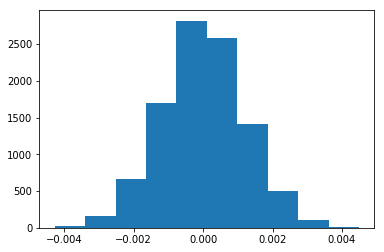

In [30]:
#plotting a histogram of p_diff
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
# computing numbers of new and old converted users
new_conv = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
old_conv = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()

In [32]:
# Computing actual converted rates
actual_new = new_conv/ n_new
actual_old = old_conv/ n_old
obs_diff = actual_new - actual_old
obs_diff

-0.0015782389853555567

In [33]:
# Computing values of a distribution under the null hypothesis
Nhypo_values = np.random.normal(0, np.std(p_diffs), len(p_diffs))

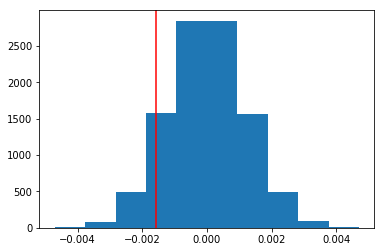

In [34]:
#plotting a histogram of Nhypo_values
plt.hist(Nhypo_values)
#Plot vertical line for observed statistic
plt.axvline(x=obs_diff,color ='red')


In [35]:
#Computing the proportion of the p_diffs  that are greater than the actual 
# difference observed in the original dataset
(Nhypo_values > obs_diff).mean()

0.90890000000000004

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- I computed the proportion of the Nhypo_values that are the greater than the actual difference(obs_diff). In scientific terms, this value is called p-value and it is shown to be uqel to  0.9081, which is far greater than than 0.05. 
- P_value rule:
  - If p-value <= 0.05 (small): strong evidence and reject the null
  - If p-value > 0.05 (large): weak evidence and fail to reject the null
- Therefore, I failed to reject the null hypothesis. Thus, there is no difference between the new and old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm

convert_old=df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new=df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old=df2.query("landing_page == 'old_page'").shape[0]
n_new=df2.query("landing_page == 'new_page'").shape[0] 


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [37]:
#computing the z score and p_value 
z_score,p_value=sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],alternative='smaller')
z_score,p_value

(1.3109241984234394, 0.90505831275902449)

In [38]:
# getting the critical edge of the z score 
from scipy.stats import norm
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- Z-score measures standard deviation(how many standard deviations are far from the mean(1.31 far from the mean which does not exceed the critical value of 1.959963984540054, I fail to reject the null hypothesis). It is also another test of statistical significance that helps to decide whether or not to reject the null. 
- And as I mentioned above that if p_value is larger than .05 means failing to reject the null hypothesis and this agrees with our previous findings as the p_value here is large(.905)

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

- Logistic regression shoud be used since response variable is categorical variable and  we want to know the odds whether a user will convert or not depending on the page.



b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
#getting the dummies (0,1) then droping the unnecessary column 
df2['intercept'] = 1
df2[['page', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop('page', axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [40]:
# building a logistic model and fit it 
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
result = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]).fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [41]:
# providing a summary for the logistic model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 27 Nov 2020   Pseudo R-squ.:               8.077e-06
Time:                        01:58:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

- The p-value of ab_page is 0.190. As I mentioned the logistic model is trying to predict whether a user will convert depending on the page. The null hypothesis is ab_page = 1, converted = 0; the alternative hypothesis is that when ab_page = 1, converted = 1. Also, Logistic interpretation differs from linear as We need to exponentiate the coefficients. If the coefficient is negative, the reciprocal is taken and flipped 'increase' to'decrease' in the interpretation so it's easier to interpret.

In [42]:
#getting expontiational 
1/np.exp(-0.0150)

1.0151130646157189

- So the intrepretation is : The new page is 1.015 times less to convert a user while all else constant.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- Because the pages( treatment or control) don't have much impact on whether a user converts. Hence, we should check other factors that may affect the predict conversion. On the other hand, we may face the multicollinearility problem due to one or more of these factor maybe related to one another.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [43]:
# reading and displaying countries dataset
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [44]:
#merging df2 to the countries dataset using user id
df3=df_countries.set_index('user_id').join(df2.set_index('user_id'),how='inner')
df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [45]:
#getting dummies of country column in df3 the new dataset
df3[['CA','UK','US']] = pd.get_dummies(df3['country'])
df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [46]:
#droping one the dummies to be able to apply logistic model
df3 = df3.drop(['US'], axis=1)
df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [47]:
# logistic model and a summary of df3 
logit = sm.Logit(df3['converted'],df3[['intercept','CA','UK']])
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 27 Nov 2020   Pseudo R-squ.:               1.521e-05
Time:                        01:58:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

- Based on the P_value for both countries (CA, UK) which is higher than .05, it looks that adding one more variable affects the result as the result still the same and I failed to reject the null hypothesis for the third time on a row. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
#Creating new intereacton variables between new page and countries CA and UK
df3['CA_ab_page'] = df3['CA']*df3['ab_page']
df3['UK_ab_page'] = df3['UK']*df3['ab_page']

In [51]:
# logistic model and a summary of new interaction variables
logit2 = sm.Logit(df3['converted'], df3[['intercept','CA_ab_page','UK_ab_page','CA','UK']])
result2 = logit2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Fri, 27 Nov 2020   Pseudo R-squ.:               2.417e-05
Time:                        02:04:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2729
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA_ab_page    -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_ab_page     0.0108      0.023      0.475      0.635      -0.034       0.056
CA            -0.0073      0.037     -0.196      0.844      -0.080       0.065
UK             0.0045      0.018      0.257      0.797      -0.030       0.039
==============================================================================
"""

In [54]:
#getting expontiationals
1/np.exp(-0.0674),np.exp(0.0108),1/np.exp(-0.0073),np.exp(0.0045)

(1.0697232819209153, 1.010858530520097, 1.0073267099546657, 1.0045101402046013)

- CA is 1.07 times less to convert while UK is 1.012 times more chance to convert, holding all other variables constant. 
-  In conculsion , I do not have enough evidence to reject the null hypothesis based on any of our A/B testing. Therefore, no need to switch to the new page, we must keep the old one as it is.


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0